In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_cleaned_datset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
df=df.drop(['day','month','year'],axis=1,inplace=True)

KeyError: "['day', 'month', 'year'] not found in axis"

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [18]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [20]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [21]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [22]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [23]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [24]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [27]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [28]:
#Train_test-split function

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [29]:
X_train.shape

(194, 11)

In [30]:
X_test.shape

(49, 11)

In [31]:
#feature selcetion based on correlation

df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [32]:
import seaborn as sns 

<Axes: >

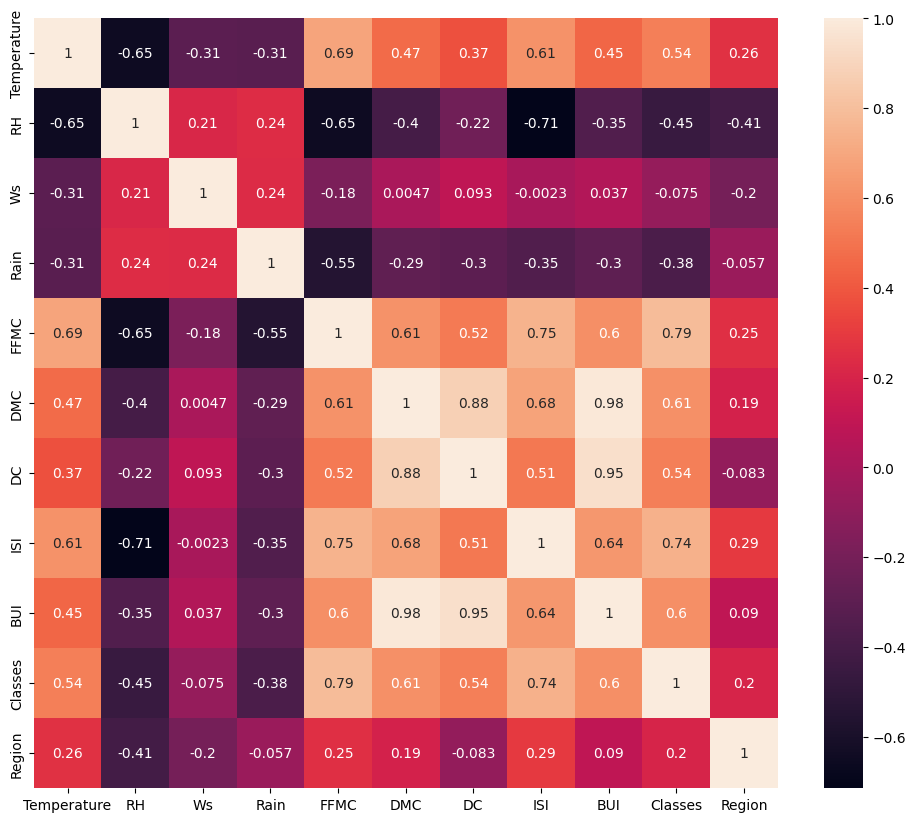

In [33]:
#check fpor multocolliniarity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [34]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [39]:
## threshold--domain expertise

cor_features=correlation(X_train,0.85)

In [40]:
#drop features with correlation is more than 0.85

X_train.drop(cor_features,axis=1,inplace=True)
X_test.drop(cor_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [41]:
#feature scaling or standardization

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [44]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [45]:
X_train_scaled,X_test_scaled

(array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
         -1.14434427, -1.01036297],
        [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
          0.8738629 ,  0.98974332],
        [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
          0.8738629 ,  0.98974332],
        ...,
        [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
         -1.14434427, -1.01036297],
        [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
          0.8738629 ,  0.98974332],
        [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
         -1.14434427, -1.01036297]]),
 array([[-0.32677059,  0.14650162, -0.2352019 , -0.38015572,  0.61070375,
         -0.07699537,  0.17532762,  0.8738629 , -1.01036297],
        [ 0.22209084, -0.52066537, -0.99568804, -0.38015572,  0.71720269,
         -0.40637763,  0.33729694,  0.8738629 , -1.01036297],
        [-1.15006273, -0.25379858,  0.90552731,  0.6761624 , -1.02228009,
         -0.91960114, -0.86

In [46]:
##Box plot to undersatnd effect of standard scaler

Text(0.5, 1.0, 'After scalling')

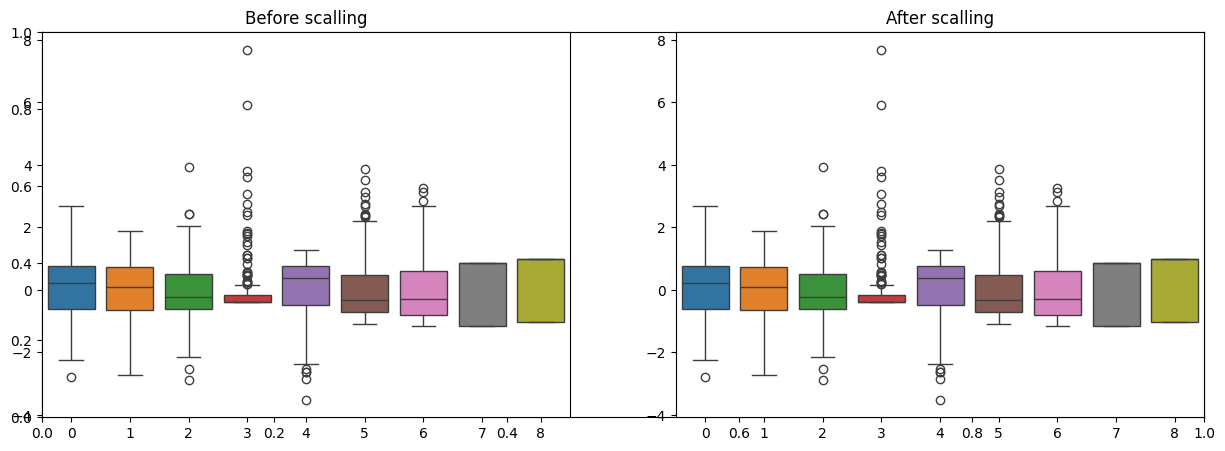

In [49]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before scalling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("After scalling")

In [51]:
# LINIAR RIGRESSION

0.5882990110708686
0.5882990110708686
0.9805895859259882


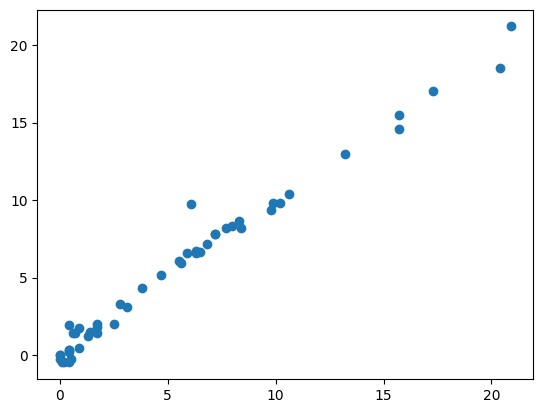

In [87]:
from sklearn.linear_model import LinearRegression
Rigression=LinearRegression()
Rigression.fit(X_train_scaled,y_train)
y_pred=Rigression.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_squared_error(y_test,y_pred)
print(mae)
mse=mean_squared_error(y_test,y_pred)
print(mse)
from sklearn.metrics import r2_score
r_squares=r2_score(y_test,y_pred)
print(r_squares)
plt.scatter(y_test,y_pred)

1.0093958923873405
1.7260423250231411
0.9430507350726564


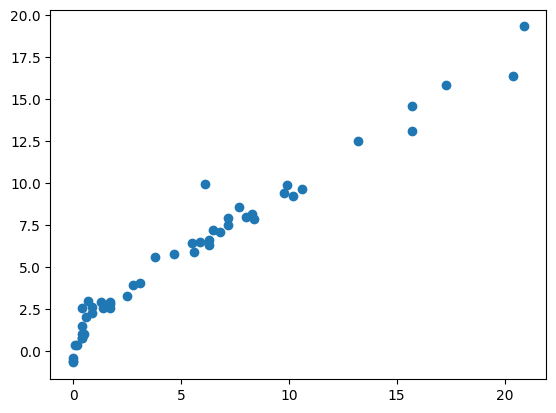

In [89]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
print(mae)
mse=mean_squared_error(y_test,y_pred)
print(mse)
r_squared=r2_score(y_test,y_pred)
print(r_squared)
plt.scatter(y_test,y_pred)

In [92]:
## CROSS VALIDATION TECHNIQUE

from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [93]:
X_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]])

In [94]:
lassocv.alpha_

0.04391080246587261

In [95]:
lassocv.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

In [96]:
lassocv.mse_path_

array([[68.58934997, 64.28650232, 49.25415197, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.20292636, 77.07183352, 34.66910628],
       [56.87389457, 51.79652473, 37.15764773, 69.4806422 , 31.16497557],
       [51.2737596 , 45.69461734, 31.98560721, 62.80993539, 27.46286399],
       [45.36816855, 40.35928545, 27.56726322, 56.94442062, 23.75447628],
       [39.875005  , 35.69250404, 23.79907917, 50.31847875, 20.54655878],
       [35.0794232 , 31.60885664, 20.59132915, 44.35263414, 17.77349727],
       [30.89154006, 28.0342798 , 17.86626498, 39.14265375, 15.37720198],
       [27.23334321, 24.90389594, 15.55674604, 34.59116894, 13.30754905],
       [24.03652419, 22.16129069, 13.60451947, 30.61376519, 11.52101422],
       [21.24273995, 19.75730052, 11.95924131, 27.13693185,  9.97950732],
       [18.80004176, 17.64896267, 10.57738151, 24.09623192,  8.65087048],
       [16.66356323, 15.79916526,  9.42117661, 21.43679316,  7.50627555],
       [14.79422393, 14.17520895,  8.4

1.6834416340136709
4.009921298441002
0.8676961352267808


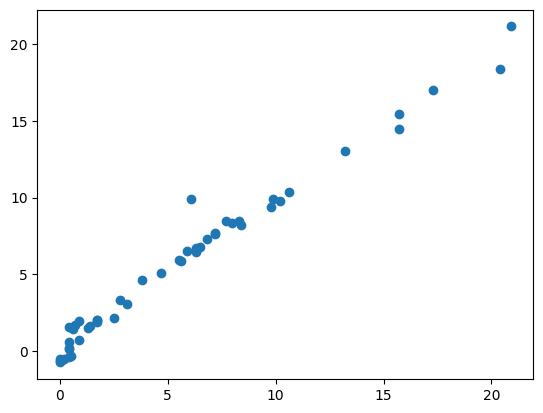

In [99]:
y__pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y__pred)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
mse=mean_squared_error(y_test,y_pred)
print(mse)
r_squared=r2_score(y_test,y_pred)
print(r_squared)

In [ ]:
#Rigdge Rigresssion module

0.5192048325844741
0.6029616070548584
0.9801058063273601


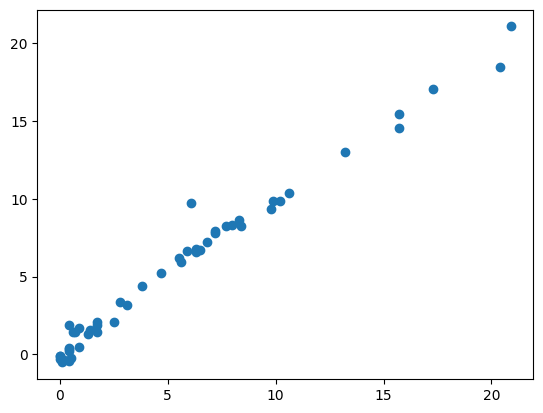

In [90]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
print(mae)
mse=mean_squared_error(y_test,y_pred)
print(mse)
r_squared=r2_score(y_test,y_pred)
print(r_squared)
plt.scatter(y_test,y_pred)

In [ ]:
#Elasticnet Rigression

1.6834416340136709
4.009921298441002
0.8676961352267808


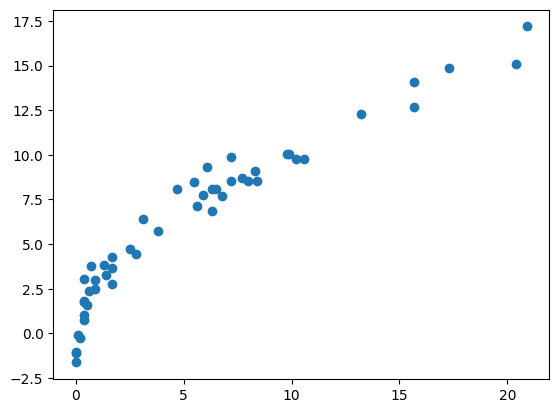

In [91]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
print(mae)
mse=mean_squared_error(y_test,y_pred)
print(mse)
r_squared=r2_score(y_test,y_pred)
print(r_squared)
plt.scatter(y_test,y_pred)

In [ ]:
##You can try Rigde cv and elasticnetcv also 
